In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns 
import random

In [ ]:
%cd "/content/drive/MyDrive/JHU courses/ML_class/Final"

/content/drive/.shortcut-targets-by-id/1jeO0lRAoT_3FCIMJ-EE3Us2liPtbQzo-/ML_class/Final


In [ ]:
%ls

 Dataset/                                old_proposal/
'Feedback Questions.gdoc'                roLabelImg-master.zip
 labeling_tutorial.mov                   Tasks.gdoc
'Links for age estimation papers.gdoc'  'Uncropped Dataset.ipynb'
 New_Final_Cross_Race_Effect/            yolov5/


# Data Loading

In [ ]:
#!tar -xvf "./Dataset/part1.tar.gz"
#!tar -xvf "./Dataset/part2.tar.gz"
#!tar -xvf "./Dataset/part3.tar.gz"

In [ ]:
#!tar -zxvf "./Dataset/crop_part1.tar.gz"
#!tar -zxvf "./Dataset/UTKFace.tar.gz"

In [ ]:
import os
from os.path import isfile, join

crop_path = "./Dataset/UTKFace/"

crop_list = [f for f in os.listdir(crop_path) if isfile(join(crop_path,f)) and f.endswith(".jpg")]

In [ ]:
import pandas as pd 

age_list = []
gender_list = []
race_list = []

for crop_img_name in crop_list:
  
  img_name = crop_img_name.split("_")

  age_list.append(int(img_name[0]))
  gender_list.append(img_name[1])
  race_list.append(img_name[2])

df = pd.DataFrame({
    "img":crop_list,
    "age":age_list,
    "gender":gender_list,
    "race":race_list
})

df

,img,age,gender,race
0,56_0_3_20170119180916188.jpg.chip.jpg,56,0,3
1,56_0_3_20170119183551541.jpg.chip.jpg,56,0,3
2,56_0_2_20170119180737540.jpg.chip.jpg,56,0,2
3,56_0_3_20170119174930466.jpg.chip.jpg,56,0,3
4,56_0_3_20170119180731484.jpg.chip.jpg,56,0,3
...,...,...,...,...
23703,2_0_2_20161219154627053.jpg.chip.jpg,2,0,2
23704,2_0_0_20161219154008997.jpg.chip.jpg,2,0,0
23705,1_0_0_20161219154556757.jpg.chip.jpg,1,0,0
23706,1_0_2_20161219154354285.jpg.chip.jpg,1,0,2


# Data Visualization 

## Race

In [ ]:
# Some images was not labeled with race
df['race'].value_counts()

0                                 10078
1                                  4526
3                                  3975
2                                  3434
4                                  1692
20170116174525125.jpg.chip.jpg        1
20170109150557335.jpg.chip.jpg        1
20170109142408075.jpg.chip.jpg        1
Name: race, dtype: int64

In [ ]:
# Find the img location
outliers = []
for i,race in enumerate(df["race"]):
  if(race == "20170116174525125.jpg.chip.jpg" or race == "20170109150557335.jpg.chip.jpg" or race == "20170109142408075.jpg.chip.jpg"):
    print(i)
    outliers.append(i)

3374
15800
15805


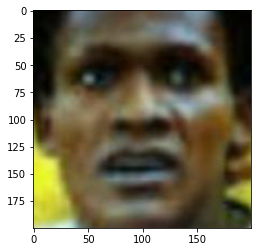

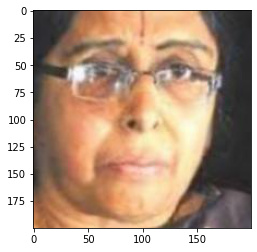

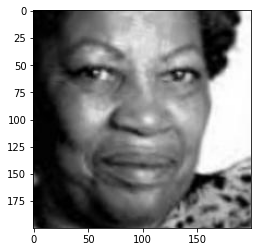

In [ ]:
# show the image for manual label
for outlier in outliers:
  img = plt.imread(join(crop_path,df["img"][outlier]))

  plt.imshow(img)
  plt.show()

In [ ]:
# label the images 
df["race"][outliers[0]] = "1"
df["race"][outliers[1]] = "3"
df["race"][outliers[2]] = "1"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [ ]:
# Check if every images are labeled
df['race'].value_counts()

0    10078
1     4528
3     3976
2     3434
4     1692
Name: race, dtype: int64

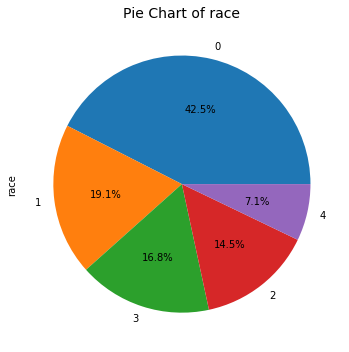

In [ ]:
plt.figure(figsize=(5,5))
df['race'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Pie Chart of race", fontdict={'fontsize': 14})
plt.tight_layout()

### devided race

In [ ]:
race_num = "2"

race_num_list = df.index[df['race'] == race_num].tolist()

df_race = df.iloc[race_num_list]

In [ ]:
#age_20_50_index = df_race.index[(df_race['age'] < 0)&(df_race['age'] >= 0)]
#df_20_50_race = df.iloc[age_20_50_index]
df_20_50_race = df_race

In [ ]:
age_range_list = []

for age in df_20_50_race["age"]:
  if(int(age)>=0 and int(age) < 10):
      # set 0-10 as class 0
      age_range_list.append(0)
  elif(int(age)>=10 and int(age) < 20):
      # set 10-20 as class 1
      age_range_list.append(1)
  elif(int(age)>=20 and int(age) < 30):
      # set 20-30 as class 2
      age_range_list.append(2)
  elif(int(age)>=30 and int(age) < 40):
      # set 30-40 as class 3
      age_range_list.append(3)
  elif(int(age)>=40 and int(age) < 50):
      # set 40-50 as class 4
      age_range_list.append(4)
  elif(int(age)>=50 and int(age) < 60):
      # set 50-60 as class 5
      age_range_list.append(5)
  elif(int(age) >= 60):
      # set 60> as class 5
      age_range_list.append(6)

df_20_50_race["age_range"] = age_range_list
df_20_50_race

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,img,age,gender,race,age_range
2,56_0_2_20170119180737540.jpg.chip.jpg,56,0,2,5
128,65_0_2_20170119205814303.jpg.chip.jpg,65,0,2,6
179,80_1_2_20170119211723865.jpg.chip.jpg,80,1,2,6
185,35_0_2_20170119180256157.jpg.chip.jpg,35,0,2,3
189,28_0_2_20170119180256157.jpg.chip.jpg,28,0,2,2
...,...,...,...,...,...
23700,4_1_2_20161219153328036.jpg.chip.jpg,4,1,2,0
23701,1_0_2_20161219154041477.jpg.chip.jpg,1,0,2,0
23702,3_0_2_20161219154525565.jpg.chip.jpg,3,0,2,0
23703,2_0_2_20161219154627053.jpg.chip.jpg,2,0,2,0


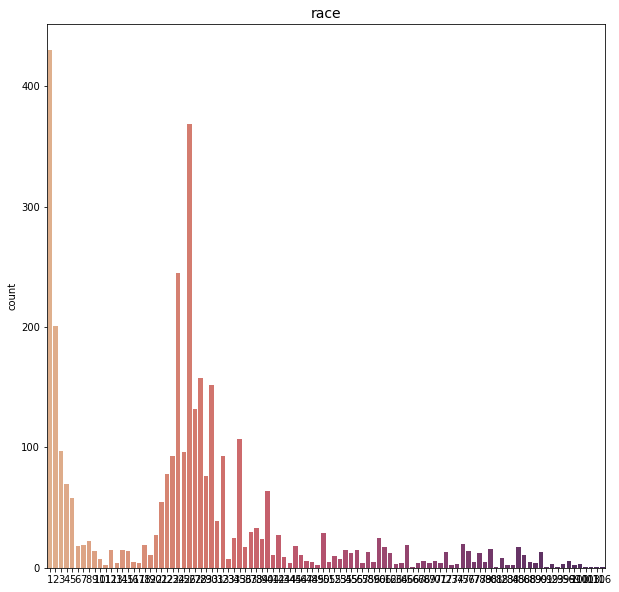

In [ ]:
alist = np.array(df_20_50_race["age"]).astype("int")
plt.figure(figsize=(10,10))
sns.countplot(x=np.sort(alist), data=df_20_50_race, palette = 'flare')
ax = plt.gca()
plt.title("race", fontdict={'fontsize': 14})
plt.show()

In [ ]:
df_20_50_race["age_range"].value_counts()

2    1329
0     929
3     527
6     281
4     157
5     115
1      96
Name: age_range, dtype: int64

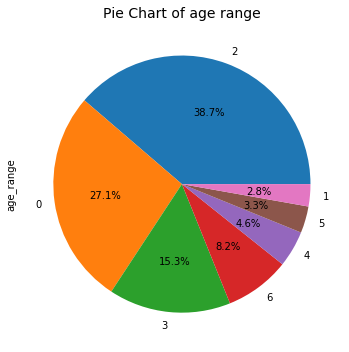

In [ ]:
plt.figure(figsize=(5,5))
df_20_50_race['age_range'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Pie Chart of age range", fontdict={'fontsize': 14})
plt.tight_layout()

### randomly choose 1082 images

In [ ]:
randomlist = random.sample(range(len(df_20_50_race)), 1692)
df_rand = df_20_50_race.iloc[randomlist]
df_rand

,img,age,gender,race,age_range
22882,1_1_2_20161219194735341.jpg.chip.jpg,1,1,2,0
10693,28_1_2_20170116164649902.jpg.chip.jpg,28,1,2,2
21323,12_1_2_20170104012405785.jpg.chip.jpg,12,1,2,1
23168,2_1_2_20161219211617551.jpg.chip.jpg,2,1,2,0
10471,26_1_2_20170116184450443.jpg.chip.jpg,26,1,2,2
...,...,...,...,...,...
13605,88_0_2_20170112223932900.jpg.chip.jpg,88,0,2,6
12468,30_0_2_20170113132649300.jpg.chip.jpg,30,0,2,3
22804,1_1_2_20161219192240930.jpg.chip.jpg,1,1,2,0
2690,27_0_2_20170119193326050.jpg.chip.jpg,27,0,2,2


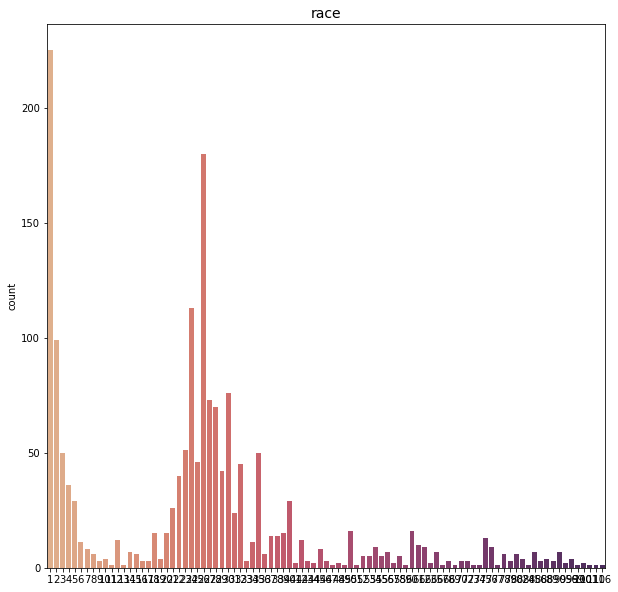

In [ ]:
alist = np.array(df_rand["age"]).astype("int")
plt.figure(figsize=(10,10))
sns.countplot(x=np.sort(alist), data=df_rand, palette = 'flare')
ax = plt.gca()
plt.title("race", fontdict={'fontsize': 14})
plt.show()

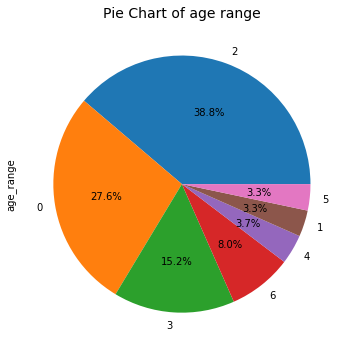

In [ ]:
plt.figure(figsize=(5,5))
df_rand['age_range'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Pie Chart of age range", fontdict={'fontsize': 14})
plt.tight_layout()

# Data setup

In [ ]:
## Additional External Libraries (Deep Learning)
import time
import datetime
import torchvision
import torch
import random
from sklearn.model_selection import train_test_split
from skimage import io
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms as tfs
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader,SubsetRandomSampler
from PIL import Image
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
from torchsummary import summary

gpu_boole = torch.cuda.is_available()

In [ ]:
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(df_rand["img"], df_rand["age_range"], test_size=0.1, random_state=601, stratify=df_rand["age_range"])
X_train_age, X_val_age, y_train_age, y_val_age = train_test_split(X_train_age, y_train_age, test_size=0.1, random_state=601, stratify=y_train_age)

In [ ]:
crop_image_path = "./Dataset/UTKFace"

img_transform = transforms.Compose([
        transforms.Resize((256, 256)), 
        transforms.RandomCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.PILToTensor(),
        transforms.AutoAugment(transforms.AutoAugmentPolicy.IMAGENET),
        transforms.ConvertImageDtype(torch.float)
])


class Crop_Face_Data(Dataset):
    def __init__(self, 
                 X_train,
                 y_train,
                 data_dir = crop_image_path,
                 transforms = img_transform, 
                 use_memory = False):
      #if load all data into memeory 
      self.use_memory = use_memory
      self.transform = transforms
      self.data = []
      self.labels = []
      for i,img_name in enumerate(X_train):
        img_path = join(data_dir, img_name)
        if self.use_memory:
          self.data.append(Image.open(img_path))
        else:
          self.data.append(img_path)
        self.labels.append(y_train.tolist()[i])

    def __len__(self):
      return len(self.labels)

    def __getitem__(self, idx):
      if self.use_memory:
        img = self.data[idx]
      else:
        img = Image.open(self.data[idx])
      if self.transform:
        img = self.transform(img)
      return img, float(self.labels[idx])

In [ ]:
Batch_Size = 16

use_memory = True

train_age_dataset = Crop_Face_Data(X_train = X_train_age, 
                                        y_train = y_train_age, 
                                        data_dir = crop_image_path, 
                                        transforms=img_transform, 
                                        use_memory = use_memory)
train_age_dataloader = DataLoader(train_age_dataset, batch_size=Batch_Size, shuffle=True)

val_age_dataset = Crop_Face_Data(X_train = X_val_age, 
                                        y_train = y_val_age, 
                                        data_dir = crop_image_path, 
                                        transforms=img_transform, 
                                        use_memory = use_memory)
val_age_dataloader = DataLoader(val_age_dataset, batch_size=Batch_Size, shuffle=True)

test_age_dataset = Crop_Face_Data(X_train = X_test_age, 
                                        y_train = y_test_age, 
                                        data_dir = crop_image_path, 
                                        transforms=img_transform, 
                                        use_memory = use_memory)
test_age_dataloader = DataLoader(test_age_dataset, batch_size=Batch_Size, shuffle=True)

In [ ]:
def train(model,
          model_name,
          optimizer,
          loss,
          lr,
          epochs,
          train_dataloader,
          val_dataloader,
          test_dataloader,
          **kwargs):
    """
    
    """
    ##TODO: Implement a training loop

    net = model.cuda()

    optimizer = optimizer(net.parameters(), lr = lr)
    loss_metric = loss()

    val_loss_old = 10000
    val_loss_unchanged_counter = 0

    train_loss_list = []
    val_acc_list = []
    train_acc_list = []
    val_loss_list = []

    
    print("Start Training")
    #training loop:
    for epoch in range(epochs):
      time1 = time.time() #timekeeping

      correct = 0
      total = 0
      loss_sum = 0

      for i, (x,y) in enumerate(train_dataloader):

        x = x.float()
        y = y.float()

        if gpu_boole:
          x = x.cuda()
          y = y.cuda()

        #loss calculation and gradient update:

        if i > 0 or epoch > 0:
          optimizer.zero_grad()
        outputs = net.forward(x)
        #print("y:",y)
        #print("outputs:",outputs)
        loss = loss_metric(outputs,y.to(torch.int64))
        loss.backward()

        loss_sum += loss

        ##performing update:
        optimizer.step()

        total += y.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted.float() == y.float()).sum()

      #print("total:",total)
      #print("correct:",correct)

      train_acc, train_loss = correct / total, loss_sum.cpu().data.numpy().item()/total

      train_loss_list.append(train_loss)
      train_acc_list.append(train_acc)


      with torch.no_grad():

          correct = 0
          total = 0
          loss_sum = 0

          for i, (x,y) in enumerate(val_dataloader):

            x = x.float()
            y = y.float()

            if gpu_boole:
              x = x.cuda()
              y = y.cuda()
            
            outputs = net.forward(x)
            loss = loss_metric(outputs,y.to(torch.int64))

            total += y.size(0)
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted.float() == y.float()).sum()
            loss_sum += loss

          val_acc, val_loss = correct / total, loss_sum.cpu().data.numpy().item()/total

          val_acc_list.append(val_acc)
          val_loss_list.append(val_loss)

          if(val_loss_old == val_loss):
            val_loss_unchanged_counter+=1
          else:
            torch.save({
            'epoch': EPOCH,
            'model_state_dict': net.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_acc': val_acc_list,
            'train_acc': train_acc_list,
            'val_loss': val_loss_list,
            'train_loss': train_loss_list,
            }, f"./New_Final_Cross_Race_Effect/race_{race_num}_checkpts/{model_name}_race_{race_num}_age_best.pt")
            val_loss_unchanged_counter = 0
          val_loss_old = val_loss

          if(100.0 *(train_acc-val_acc)<=10):
            torch.save({
            'epoch': EPOCH,
            'model_state_dict': net.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_acc': val_acc_list,
            'train_acc': train_acc_list,
            'val_loss': val_loss_list,
            'train_loss': train_loss_list,
            }, f"/content/drive/MyDrive/JHU courses/ML_class/Final/New_Final_Cross_Race_Effect/race_{race_num}_checkpts/Before_overfitting_{model_name}_race_{race_num}_age_best.pt")

          print("Epoch",epoch+1,':')

          print("-"*20)
          print('Train accuracy: %f %%' % (100.0 * train_acc))
          print('Train loss: %f' % (train_loss))
          print("-"*20)
          print('Validation accuracy: %f %%' % (100.0 * val_acc))
          print('Validation loss: %f' % (val_loss))
          print("-"*20)

          time2 = time.time() #timekeeping
          print('Elapsed time for epoch:',time2 - time1,'s')
          print('ETA of completion:',(time2 - time1)*(epochs - epoch - 1)/60,'minutes')
          print()

          if(val_loss_unchanged_counter == 10):
            print("validation loss hasn't changed in 10 epochs: end training")
            break

    plt.figure(figsize=(10,10))
    plt.plot(torch.tensor(train_loss_list).cpu().detach().numpy(), '-o', label = 'train_loss', color = 'orange')
    plt.xlabel('Epochs')
    plt.ylabel('Train Loss')
    plt.legend()
    plt.show()


    plt.figure(figsize=(10,10))
    plt.plot(torch.tensor(val_acc_list).cpu().detach().numpy(), '-o', label = 'val_acc', color = 'blue')
    plt.xlabel('Epochs')
    plt.ylabel('Val Accuracy')
    plt.legend()
    plt.show()

    with torch.no_grad():

        correct = 0
        total = 0
        loss_sum = 0

        for i, (x,y) in enumerate(test_dataloader):

          x = x.float()
          y = y.float()

          if gpu_boole:
            x = x.cuda()
            y = y.cuda()

          outputs = net.forward(x)
          loss = loss_metric(outputs,y.to(torch.int64))

          total += y.size(0)
          _, predicted = torch.max(outputs.data, 1)
          correct += (predicted.float() == y.float()).sum()

          loss_sum += loss

        test_acc, test_loss = correct / total, loss_sum.cpu().data.numpy().item()/total

        print("-"*20)
        print('Test accuracy: %f %%' % (100.0 * test_acc))
        print('Test loss: %f' % (test_loss))
        print("-"*20)

# VGG16

In [ ]:
import torchvision.models as models

class VGG16(nn.Module):
  def __init__(self, in_channels=3):
    super(VGG16, self).__init__()

    # Load a pretrained resnet model from torchvision.models in Pytorch
    self.model = models.vgg16(pretrained=True)

    # Change the input layer to take Grayscale image, instead of RGB images. 
    # Hence in_channels is set as 1 or 3 respectively
    # original definition of the first layer on the ResNet class
    # self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
    self.model.conv1 = nn.Conv2d(in_channels, 64,3)

    i=0
    #for param in self.model.parameters():
    #    if i>39 and i<343:
    #        param.requires_grad = False
    #    i+=1 
    
    # Change the output layer to output 10 classes instead of 1000 classes
    num_ftrs = self.model.classifier[6].in_features
    self.model.classifier[6] = nn.Sequential(
        nn.Linear(num_ftrs, 1024),
        nn.ReLU(),
        nn.Linear(1024, 512),
        nn.ReLU(),
        nn.Dropout(),
        nn.Linear(512, 7))

  def forward(self, x):
    x = self.model(x)
    return F.log_softmax(x,dim=1)

In [ ]:
with torch.no_grad():
  dummy_net = VGG16()
  dummy_net = dummy_net.cuda()
  summary(dummy_net, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [ ]:
## Hyperparameters
EPOCH = 200
LR = 0.0001

## Setting up the model, optimizer, and loss function
model = VGG16()
model_name = "VGG16"
optimizer = optim.SGD
loss_f = nn.NLLLoss

Start Training
Epoch 1 :
--------------------
Train accuracy: 18.699781 %
Train loss: 0.121231
--------------------
Validation accuracy: 13.725491 %
Validation loss: 0.125950
--------------------
Elapsed time for epoch: 51.17776155471802 s
ETA of completion: 169.7395758231481 minutes

Epoch 2 :
--------------------
Train accuracy: 21.037254 %
Train loss: 0.120462
--------------------
Validation accuracy: 22.875816 %
Validation loss: 0.124746
--------------------
Elapsed time for epoch: 50.9481086730957 s
ETA of completion: 168.1287586212158 minutes

Epoch 3 :
--------------------
Train accuracy: 22.936451 %
Train loss: 0.119499
--------------------
Validation accuracy: 25.490198 %
Validation loss: 0.123810
--------------------
Elapsed time for epoch: 50.8890426158905 s
ETA of completion: 167.08568992217383 minutes

Epoch 4 :
--------------------
Train accuracy: 27.027029 %
Train loss: 0.118654
--------------------
Validation accuracy: 32.679741 %
Validation loss: 0.123175
-------------

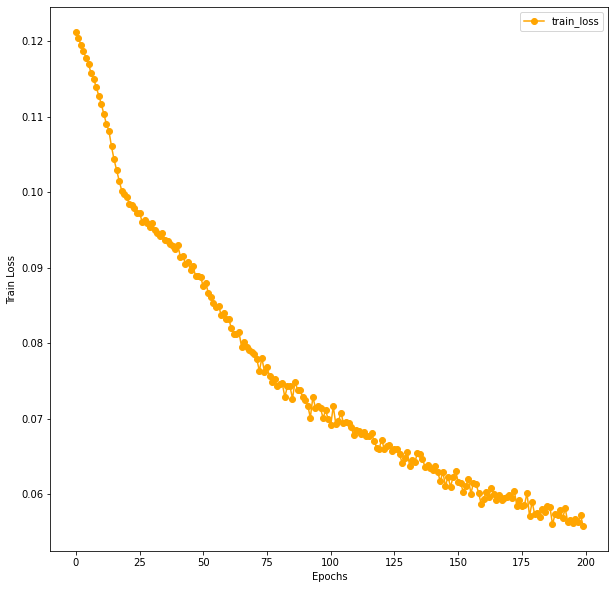

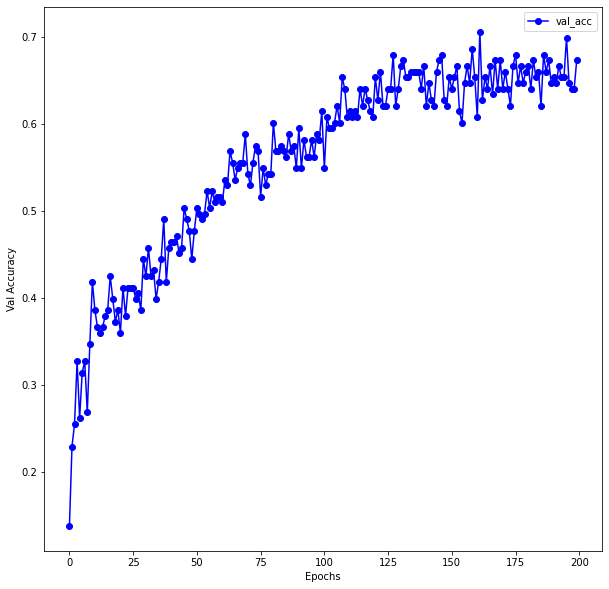

--------------------
Test accuracy: 70.588234 %
Test loss: 0.057810
--------------------


In [ ]:
## Run Training Loop
out = train(model, 
            model_name,
            optimizer, 
            loss_f,
            LR,
            epochs = EPOCH,
            train_dataloader = train_age_dataloader,
            val_dataloader = val_age_dataloader,
            test_dataloader = test_age_dataloader)

In [ ]:
import gc
del train
#del train_age_dataset
#del train_age_dataloader
#del val_age_dataset
#del val_age_dataloader
#del test_age_dataset
#del test_age_dataloader
gc.collect()

6245

# Resnet101

In [ ]:
import torchvision.models as models

class ResNet101(nn.Module):
  def __init__(self, in_channels=3):
    super(ResNet101, self).__init__()

    # Load a pretrained resnet model from torchvision.models in Pytorch
    self.model = models.resnet18(pretrained=True)

    # Change the input layer to take Grayscale image, instead of RGB images. 
    # Hence in_channels is set as 1 or 3 respectively
    # original definition of the first layer on the ResNet class
    # self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
    self.model.conv1 = nn.Conv2d(in_channels, 64,3)

    #i=0
    #for param in self.model.parameters():
    #    if i>39 and i<343:
    #        param.requires_grad = False
    #    i+=1 
    
    # Change the output layer to output 10 classes instead of 1000 classes
    num_ftrs = self.model.fc.in_features
    self.model.fc = nn.Sequential(
        nn.Linear(num_ftrs,512),
        nn.LeakyReLU(),
        nn.Dropout(0.8),
        nn.Linear(512,256),
        nn.LeakyReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, 7))
    #self.model.fc = nn.Linear(num_ftrs, 7)

  def forward(self, x):
    x = self.model(x)
    return F.log_softmax(x,dim=1)

In [ ]:
with torch.no_grad():
  dummy_net = ResNet101()
  dummy_net = dummy_net.cuda()
  summary(dummy_net, (3, 224, 224))

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 222, 222]           1,792
       BatchNorm2d-2         [-1, 64, 222, 222]             128
              ReLU-3         [-1, 64, 222, 222]               0
         MaxPool2d-4         [-1, 64, 111, 111]               0
            Conv2d-5         [-1, 64, 111, 111]          36,864
       BatchNorm2d-6         [-1, 64, 111, 111]             128
              ReLU-7         [-1, 64, 111, 111]               0
            Conv2d-8         [-1, 64, 111, 111]          36,864
       BatchNorm2d-9         [-1, 64, 111, 111]             128
             ReLU-10         [-1, 64, 111, 111]               0
       BasicBlock-11         [-1, 64, 111, 111]               0
           Conv2d-12         [-1, 64, 111, 111]          36,864
      BatchNorm2d-13         [-1, 64, 111, 111]             128
             ReLU-14         [-1, 64, 1

In [ ]:
## Hyperparameters
EPOCH = 200
LR = 0.0001

## Setting up the model, optimizer, and loss function
model = ResNet101()
model_name = "resnet101"
optimizer = optim.SGD
loss_f = nn.NLLLoss

Start Training
Epoch 1 :
--------------------
Train accuracy: 14.682250 %
Train loss: 0.123278
--------------------
Validation accuracy: 18.300653 %
Validation loss: 0.125319
--------------------
Elapsed time for epoch: 45.77829670906067 s
ETA of completion: 151.83135075171788 minutes

Epoch 2 :
--------------------
Train accuracy: 18.407598 %
Train loss: 0.121457
--------------------
Validation accuracy: 15.686275 %
Validation loss: 0.128401
--------------------
Elapsed time for epoch: 45.63819432258606 s
ETA of completion: 150.60604126453399 minutes

Epoch 3 :
--------------------
Train accuracy: 17.531044 %
Train loss: 0.121099
--------------------
Validation accuracy: 22.875816 %
Validation loss: 0.124171
--------------------
Elapsed time for epoch: 45.471744775772095 s
ETA of completion: 149.2988953471184 minutes

Epoch 4 :
--------------------
Train accuracy: 22.717314 %
Train loss: 0.118156
--------------------
Validation accuracy: 20.915033 %
Validation loss: 0.125138
---------

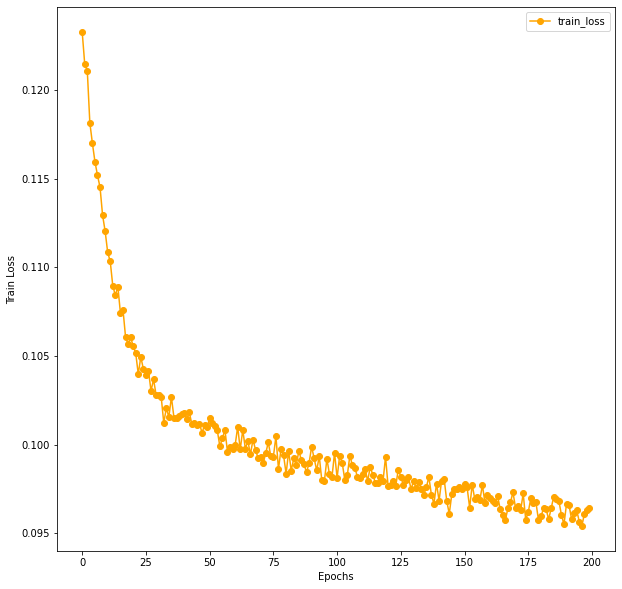

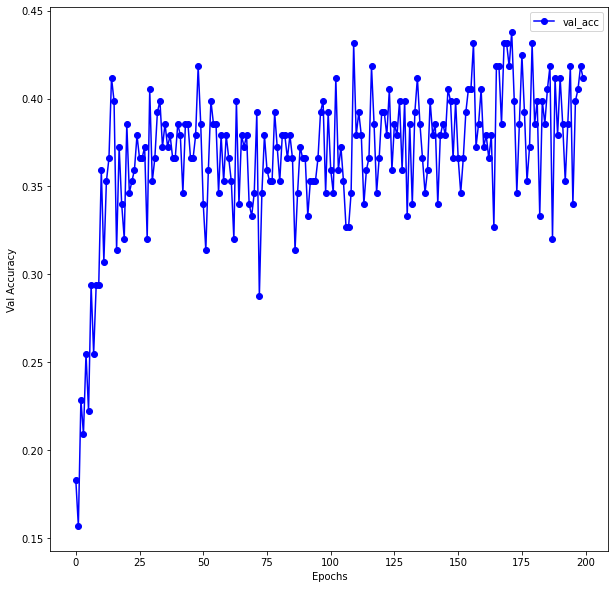

--------------------
Test accuracy: 44.117649 %
Test loss: 0.096620
--------------------


In [ ]:
## Run Training Loop
out = train(model,
            model_name, 
            optimizer, 
            loss_f,
            LR,
            epochs = EPOCH,
            train_dataloader = train_age_dataloader,
            val_dataloader = val_age_dataloader,
            test_dataloader = test_age_dataloader)

In [ ]:
del model
del train